In [9]:
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler

diabetes_binary_5050split_health_indicators_BRFSS2015.csv is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and **is balanced.**

In [45]:
data = pd.read_csv("/Users/jorgegutierrezjr./Downloads/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
# below is the Features values
X = data.drop("Diabetes_binary", axis=1)  # Features
y = data["Diabetes_binary"]  # Target variable

# split data into training and testing sets
 #decide how to split them, 2/8..1/9...4/6..
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#making the model and testing
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

#resulting accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, predictions))

Accuracy: 0.7484263384963576
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64


<AxesSubplot:ylabel='Diabetes_binary'>

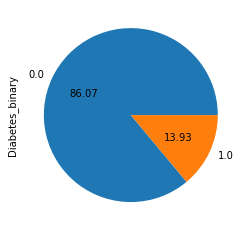

In [48]:
print(y.value_counts())
y.value_counts().plot.pie(autopct='%.2f')

diabetes_binary_health_indicators_BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.
**I NEED TO BALANCE THIS DATA**

In [47]:
data = pd.read_csv("/Users/jorgegutierrezjr./Downloads/diabetes_binary_health_indicators_BRFSS2015.csv")
# below is the Features values
#print(data)
X = data.drop("Diabetes_binary", axis=1)  # Features
y = data["Diabetes_binary"]  # Target variable

#split data into training and testing sets
#decide how to split them, 2/8..1/9...4/6..
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


random_UnderSampled = RandomUnderSampler(sampling_strategy=1)
X_train_resampled, y_train_resampled = random_UnderSampled.fit_resample(X_train, y_train) #valueerror


model = LogisticRegression(solver='lbfgs', max_iter=1000)

model.fit(X_train_resampled, y_train_resampled)


predictions = model.predict(X_test)

#resulting accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, predictions))

Accuracy: 0.7323596657205929
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82     43739
         1.0       0.31      0.78      0.44      6997

    accuracy                           0.73     50736
   macro avg       0.63      0.75      0.63     50736
weighted avg       0.86      0.73      0.77     50736



diabetes_012_health_indicators_BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class **imbalance** in this dataset. This dataset has 21 feature variables

In [33]:
# THIS IS THE SAMPLING CODE
data = pd.read_csv("/Users/jorgegutierrezjr./Downloads/diabetes_012_health_indicators_BRFSS2015.csv")
# below is the Features values
#print(data)
X = data.drop("Diabetes_012", axis=1)  # Features
y = data["Diabetes_012"]  # Target variable

#split data into training and testing sets
#decide how to split them, 2/8..1/9...4/6..
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sampling_values = {0: 1000, 1:1000, 2:1000}
random_UnderSampled = RandomUnderSampler(sampling_strategy=sampling_values)
X_train_resampled, y_train_resampled = random_UnderSampled.fit_resample(X_train, y_train) #valueerror

model = LogisticRegression(solver='lbfgs', max_iter=2000)
model.fit(X_train_resampled, y_train_resampled)


predictions = model.predict(X_test)

#resulting accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, predictions))

Accuracy: 0.6470356354462314
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.67      0.78     42795
         1.0       0.03      0.34      0.06       944
         2.0       0.35      0.56      0.43      6997

    accuracy                           0.65     50736
   macro avg       0.45      0.52      0.43     50736
weighted avg       0.85      0.65      0.72     50736



In [24]:
# THIS IS BEFORE UNDERSAMPLING
data = pd.read_csv("/Users/jorgegutierrezjr./Downloads/diabetes_012_health_indicators_BRFSS2015.csv")
# below is the Features values
#print(data)
X = data.drop("Diabetes_012", axis=1)  # Features
y = data["Diabetes_012"]  # Target variable

#split data into training and testing sets
#decide how to split them, 2/8..1/9...4/6..
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(solver='lbfgs', max_iter=1500)
model.fit(X_train, y_train)


predictions = model.predict(X_test)

#resulting accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, predictions))

Accuracy: 0.6476072216966257
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     42795
         1.0       0.03      0.31      0.06       944
         2.0       0.35      0.59      0.44      6997

    accuracy                           0.65     50736
   macro avg       0.45      0.52      0.43     50736
weighted avg       0.85      0.65      0.72     50736

